In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# ACA2 Evaluation

In [4]:
mooc = pd.read_csv("/Users/yanzhen/Desktop/aca2_dataset_training.csv")
mooc

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,34880,A,T8T,2,Z,965160,1,12,224,Wholecarpet,Y,1,2,1,2,1390.500000,0.000664,1027
1,32344,B,T9U,3,Z,11665,1,11,225,Individual,Y,2,3,2,3,890.333333,0.002545,213
2,14774,B,T9Q,0,Z,187441,0,21,374,Smallgroup,Y,3,4,1,2,770.500000,0.001439,2078
3,19468,A,T8S,1,Z,402837,0,17,320,Wholedesks,Y,5,6,0,1,592.333333,0.001407,3229
4,31570,B,T9T,2,Z,300647,1,2,35,Wholedesks,Y,2,3,1,2,870.000000,0.005882,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,30762,B,T9Q,0,Z,749212,1,5,95,Wholecarpet,Y,2,3,2,3,969.000000,0.002959,652
22180,14611,B,T9Q,0,Z,87701,0,12,211,Smallgroup,N,3,4,1,2,770.500000,0.001439,708
22181,20432,A,T8VQ,4,Z,130859,0,6,95,Smallgroup,N,1,2,0,1,1060.000000,0.000472,362
22182,38264,E,T6Q,0,Y,874565,1,10,147,Wholedesks,Y,1,2,1,2,1204.500000,0.000838,60


In [10]:
# select related variables
mooc2 = mooc [['GRADE', 'Gender', 'Activity', 'ONTASK', 'Total Time', 'totalobs-forsession', 'NumACTIVITIES', 'TRANSITIONS', 'NumFORMATS', 'FORMATchanges', 'Obsv/act', 'Transitions/Durations']]
mooc2

,GRADE,Gender,Activity,ONTASK,Total Time,totalobs-forsession,NumACTIVITIES,TRANSITIONS,NumFORMATS,FORMATchanges,Obsv/act,Transitions/Durations
0,2,1,Wholecarpet,Y,1027,224,2,1,2,1,1390.500000,0.000664
1,3,1,Individual,Y,213,225,3,2,3,2,890.333333,0.002545
2,0,0,Smallgroup,Y,2078,374,4,3,2,1,770.500000,0.001439
3,1,0,Wholedesks,Y,3229,320,6,5,1,0,592.333333,0.001407
4,2,1,Wholedesks,Y,260,35,3,2,2,1,870.000000,0.005882
...,...,...,...,...,...,...,...,...,...,...,...,...
22179,0,1,Wholecarpet,Y,652,95,3,2,3,2,969.000000,0.002959
22180,0,0,Smallgroup,N,708,211,4,3,2,1,770.500000,0.001439
22181,4,0,Smallgroup,N,362,95,2,1,1,0,1060.000000,0.000472
22182,0,1,Wholedesks,Y,60,147,2,1,2,1,1204.500000,0.000838


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
# transform the variable 'ONTASK' into dummy code
dummy = pd.get_dummies(mooc2['ONTASK'], prefix = 'ONTASK')
dummy

,ONTASK_N,ONTASK_Y
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
22179,0,1
22180,1,0
22181,1,0
22182,0,1


In [13]:
moocD = pd.concat([mooc2, dummy], axis=1)
moocD = moocD.drop(['ONTASK', 'ONTASK_N'], axis=1)
moocD

,GRADE,Gender,Activity,Total Time,totalobs-forsession,NumACTIVITIES,TRANSITIONS,NumFORMATS,FORMATchanges,Obsv/act,Transitions/Durations,ONTASK_Y
0,2,1,Wholecarpet,1027,224,2,1,2,1,1390.500000,0.000664,1
1,3,1,Individual,213,225,3,2,3,2,890.333333,0.002545,1
2,0,0,Smallgroup,2078,374,4,3,2,1,770.500000,0.001439,1
3,1,0,Wholedesks,3229,320,6,5,1,0,592.333333,0.001407,1
4,2,1,Wholedesks,260,35,3,2,2,1,870.000000,0.005882,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22179,0,1,Wholecarpet,652,95,3,2,3,2,969.000000,0.002959,1
22180,0,0,Smallgroup,708,211,4,3,2,1,770.500000,0.001439,0
22181,4,0,Smallgroup,362,95,2,1,1,0,1060.000000,0.000472,0
22182,0,1,Wholedesks,60,147,2,1,2,1,1204.500000,0.000838,1


In [14]:
Xs = moocD[["GRADE","Total Time",  "NumACTIVITIES", "TRANSITIONS","NumFORMATS","FORMATchanges", "Obsv/act", "Transitions/Durations" ]].to_numpy()
ONTASK = moocD.loc[:,"ONTASK_Y"].values.reshape(-1, 1)

In [15]:
moocDLogitModel1 = LogisticRegression()
moocDLogitModel1.fit(Xs, ONTASK)

/Users/yanzhen/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [17]:
validation= pd.read_csv('/Users/yanzhen/Desktop/aca2_dataset_validation.csv')
validation

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,20774,A,T8VQ,4,Z,15210,0,1,1,Wholecarpet,Y,1,2,1,2,1677.00,0.000446,0
1,30961,B,T9S,1,Z,165165,0,1,1,Wholedesks,Y,3,4,3,4,826.00,0.003672,0
2,35767,A,T8R,4,Z,188548,1,1,1,Wholecarpet,Y,3,4,2,3,862.75,0.004658,0
3,19990,A,T8T,2,Z,224646,0,1,1,Wholecarpet,N,2,3,0,1,1073.00,0.000621,0
4,18668,A,T8S,1,Z,402837,0,1,1,Individual,Y,3,4,2,3,1106.75,0.002841,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,21660,A,T8R,4,Z,857436,0,31,487,Testing,Y,0,1,0,1,2530.00,0.000000,2367
5543,21662,A,T8R,4,Z,402069,1,31,489,Testing,Y,0,1,0,1,2530.00,0.000000,2375
5544,21665,A,T8R,4,Z,94671,1,31,492,Testing,N,0,1,0,1,2530.00,0.000000,2389
5545,21682,A,T8R,4,Z,762145,1,32,509,Testing,Y,0,1,0,1,2530.00,0.000000,2522


In [18]:
validation2 = validation [['GRADE', 'Gender', 'Activity', 'ONTASK', 'Total Time', 'totalobs-forsession', 'NumACTIVITIES', 'TRANSITIONS', 'NumFORMATS', 'FORMATchanges', 'Obsv/act', 'Transitions/Durations']]
validation2

,GRADE,Gender,Activity,ONTASK,Total Time,totalobs-forsession,NumACTIVITIES,TRANSITIONS,NumFORMATS,FORMATchanges,Obsv/act,Transitions/Durations
0,4,0,Wholecarpet,Y,0,1,2,1,2,1,1677.00,0.000446
1,1,0,Wholedesks,Y,0,1,4,3,4,3,826.00,0.003672
2,4,1,Wholecarpet,Y,0,1,4,3,3,2,862.75,0.004658
3,2,0,Wholecarpet,N,0,1,3,2,1,0,1073.00,0.000621
4,1,0,Individual,Y,0,1,4,3,3,2,1106.75,0.002841
...,...,...,...,...,...,...,...,...,...,...,...,...
5542,4,0,Testing,Y,2367,487,1,0,1,0,2530.00,0.000000
5543,4,1,Testing,Y,2375,489,1,0,1,0,2530.00,0.000000
5544,4,1,Testing,N,2389,492,1,0,1,0,2530.00,0.000000
5545,4,1,Testing,Y,2522,509,1,0,1,0,2530.00,0.000000


In [19]:
dummy2 = pd.get_dummies(validation2['ONTASK'], prefix = 'ONTASK')
dummy2

,ONTASK_N,ONTASK_Y
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
5542,0,1
5543,0,1
5544,1,0
5545,0,1


In [20]:
validation2 = pd.concat([validation2, dummy2], axis=1)
validation2 = validation2.drop(['ONTASK', 'ONTASK_N'], axis=1)
validation2

,GRADE,Gender,Activity,Total Time,totalobs-forsession,NumACTIVITIES,TRANSITIONS,NumFORMATS,FORMATchanges,Obsv/act,Transitions/Durations,ONTASK_Y
0,4,0,Wholecarpet,0,1,2,1,2,1,1677.00,0.000446,1
1,1,0,Wholedesks,0,1,4,3,4,3,826.00,0.003672,1
2,4,1,Wholecarpet,0,1,4,3,3,2,862.75,0.004658,1
3,2,0,Wholecarpet,0,1,3,2,1,0,1073.00,0.000621,0
4,1,0,Individual,0,1,4,3,3,2,1106.75,0.002841,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5542,4,0,Testing,2367,487,1,0,1,0,2530.00,0.000000,1
5543,4,1,Testing,2375,489,1,0,1,0,2530.00,0.000000,1
5544,4,1,Testing,2389,492,1,0,1,0,2530.00,0.000000,0
5545,4,1,Testing,2522,509,1,0,1,0,2530.00,0.000000,1


In [22]:
Xs_logit = validation2[["GRADE","NumACTIVITIES", "Total Time", "TRANSITIONS","NumFORMATS","FORMATchanges","Obsv/act", "Transitions/Durations"]].to_numpy()
ONTASK_logit = validation2.loc[:,"ONTASK_Y"].values.reshape(-1, 1)

In [23]:
ONTASK_pred_logit1 = moocDLogitModel1.predict(Xs_logit)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
print(confusion_matrix(ONTASK_logit, ONTASK_pred_logit1))

[[   0 1849]
 [   0 3698]]


## ROC curves and AUC curves

In [26]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# keep probabilities for the positive outcome only
ONTASK_pred_logit1 = ONTASK_pred_logit1[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


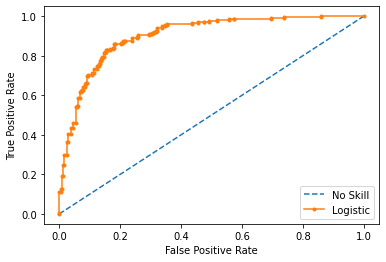

In [27]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# ACA3 Evaluation

In [28]:
import pandas as pd
import numpy as np

In [29]:
ACAdata = pd.read_csv("/Users/yanzhen/Desktop/CollegeScorecard.csv")
ACAdata.shape

/Users/yanzhen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(7804, 1725)

In [30]:
ACAdata2 = ACAdata[['UNITID', 'PCIP13', 'CIP13BACHL', 'ADM_RATE_ALL', 'RET_FT4', 'RET_PT4', 'RET_FTL4', 'RET_PTL4', 'C150_4', 'C200_4', 'C200_L4', 'C150_4_POOLED','CDR3', 'PELL_RPY_3YR_RT', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN', 'INEXPFTE', 'AVGFACSAL']]
ACAdata2

,UNITID,PCIP13,CIP13BACHL,ADM_RATE_ALL,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,C150_4,C200_4,C200_L4,C150_4_POOLED,CDR3,PELL_RPY_3YR_RT,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,INEXPFTE,AVGFACSAL
0,100654,0.1490,2.0,0.8989,0.6314,0.5000,NaN,NaN,0.2914,0.3520,NaN,0.308718,0.163,0.443586698,33611.5,14250,7459.0,7079.0
1,100663,0.0862,2.0,0.8673,0.8016,0.5000,NaN,NaN,0.5377,0.4881,NaN,0.508550,0.080,0.732297853,23117,11886,17208.0,10170.0
2,100690,0.0000,0.0,NaN,0.3750,0.3333,NaN,NaN,0.6667,0.3333,NaN,0.285738,0.089,PrivacySuppressed,26995,9500,5123.0,3849.0
3,100706,0.0173,2.0,0.8062,0.8098,0.4444,NaN,NaN,0.4835,0.5048,NaN,0.478211,0.077,0.738341969,24738,10500,9352.0,9341.0
4,100724,0.2150,2.0,0.5125,0.6219,0.3023,NaN,NaN,0.2517,0.3013,NaN,0.257482,0.191,0.320016821,33452,12500,7393.0,6557.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160,0.42789148,10500,5500,NaN,NaN
7800,48285704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160,0.42789148,10500,5500,NaN,NaN
7801,48285705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160,0.42789148,10500,5500,NaN,NaN
7802,48285706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.160,0.42789148,10500,5500,NaN,NaN


In [31]:
ACAdata2['PCIP13'].replace('PrivacySuppressed',0.0)
ACAdata2['CIP13BACHL'].replace('PrivacySuppressed',0.0)
ACAdata2['ADM_RATE_ALL'].replace('PrivacySuppressed',0.0)
ACAdata2['RET_FT4'].replace('PrivacySuppressed',0.0)
ACAdata2['RET_PT4'].replace('PrivacySuppressed',0.0)
ACAdata2['RET_FTL4'].replace('PrivacySuppressed',0.0)
ACAdata2['RET_PTL4'].replace('PrivacySuppressed',0.0)
ACAdata2['C150_4'].replace('PrivacySuppressed',0.0)
ACAdata2['C200_4'].replace('PrivacySuppressed',0.0)
ACAdata2['C200_L4'].replace('PrivacySuppressed',0.0)
ACAdata2['C150_4_POOLED'].replace('PrivacySuppressed',0.0)
ACAdata2['CDR3'].replace('PrivacySuppressed',0.0)
ACAdata2['PELL_RPY_3YR_RT'].replace('PrivacySuppressed',0.0)
ACAdata2['GRAD_DEBT_MDN'].replace('PrivacySuppressed',0.0)
ACAdata2['INEXPFTE'].replace('PrivacySuppressed',0.0)
ACAdata2['WDRAW_DEBT_MDN'].replace('PrivacySuppressed',0.0)
ACAdata2['AVGFACSAL'].replace('PrivacySuppressed',0.0)
ACAdata2 = ACAdata2.replace('PrivacySuppressed', 0.0)
ACAdata2 = ACAdata2.replace('nan', -1)
ACAdata2 = ACAdata2.fillna(-1)
ACAdata2

,UNITID,PCIP13,CIP13BACHL,ADM_RATE_ALL,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,C150_4,C200_4,C200_L4,C150_4_POOLED,CDR3,PELL_RPY_3YR_RT,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,INEXPFTE,AVGFACSAL
0,100654,0.1490,2.0,0.8989,0.6314,0.5000,-1.0,-1.0,0.2914,0.3520,-1.0,0.308718,0.163,0.443586698,33611.5,14250,7459.0,7079.0
1,100663,0.0862,2.0,0.8673,0.8016,0.5000,-1.0,-1.0,0.5377,0.4881,-1.0,0.508550,0.080,0.732297853,23117,11886,17208.0,10170.0
2,100690,0.0000,0.0,-1.0000,0.3750,0.3333,-1.0,-1.0,0.6667,0.3333,-1.0,0.285738,0.089,0.0,26995,9500,5123.0,3849.0
3,100706,0.0173,2.0,0.8062,0.8098,0.4444,-1.0,-1.0,0.4835,0.5048,-1.0,0.478211,0.077,0.738341969,24738,10500,9352.0,9341.0
4,100724,0.2150,2.0,0.5125,0.6219,0.3023,-1.0,-1.0,0.2517,0.3013,-1.0,0.257482,0.191,0.320016821,33452,12500,7393.0,6557.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.160,0.42789148,10500,5500,-1.0,-1.0
7800,48285704,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.160,0.42789148,10500,5500,-1.0,-1.0
7801,48285705,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.160,0.42789148,10500,5500,-1.0,-1.0
7802,48285706,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.160,0.42789148,10500,5500,-1.0,-1.0


In [32]:
from sklearn.decomposition import PCA
ACAdata2_noid = ACAdata2.drop(['UNITID'], axis = 1)
pca = PCA(n_components=7)
pca.fit(ACAdata2_noid)
print("The principal components are:")
print(pca.components_)
print("The explained variances are:")
print(pca.explained_variance_)

The principal components are:
[[ 2.77641105e-06  2.50678393e-05  3.50901303e-05  3.96504824e-05
   2.27734208e-05 -3.89846410e-05 -2.11188504e-05  3.55880922e-05
   3.38941033e-05 -3.52052561e-05  3.56172227e-05  1.35622677e-06
   2.73302258e-05  9.30864981e-01  3.41951520e-01 -2.48607883e-02
   1.26259549e-01]
 [ 1.87663629e-07  1.41807996e-05  1.41493232e-05  1.78883947e-05
   5.67453041e-06 -1.87116583e-05 -8.14052585e-06  1.65060937e-05
   1.74757307e-05 -1.68524359e-05  1.68709781e-05 -2.77119671e-06
  -3.89603502e-06 -5.99528914e-03  3.67781275e-02  9.89529889e-01
   1.39434653e-01]
 [-1.42473650e-05 -7.68112983e-05 -5.92954519e-05 -7.39490922e-05
  -4.72501383e-05  4.33708591e-05 -8.00016492e-06 -6.96387105e-05
  -6.61206115e-05  4.47197770e-05 -6.98773602e-05  2.85766821e-06
  -2.08727610e-05  2.76936977e-01 -4.30854170e-01  1.37162717e-01
  -8.47854320e-01]
 [ 3.90751469e-06 -2.57311045e-05  4.84804781e-06 -3.10112176e-05
  -1.12321817e-05  4.62050528e-05  1.35842157e-05 -3.35

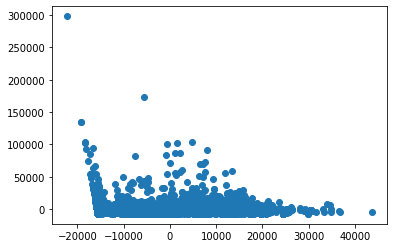

In [33]:
ACAdata2_dr = pca.transform(ACAdata2_noid)
plt.scatter(ACAdata2_dr[:,0], ACAdata2_dr[:,1])

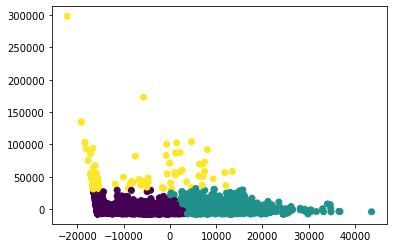

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(ACAdata2_dr)
cluster_kmeans = kmeans.predict(ACAdata2_dr)

plt.scatter(ACAdata2_dr[:, 0], ACAdata2_dr[:, 1], c=cluster_kmeans, cmap='viridis') 

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [36]:
from yellowbrick.cluster import silhouette_visualizer
from sklearn.metrics import silhouette_score

/Users/yanzhen/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


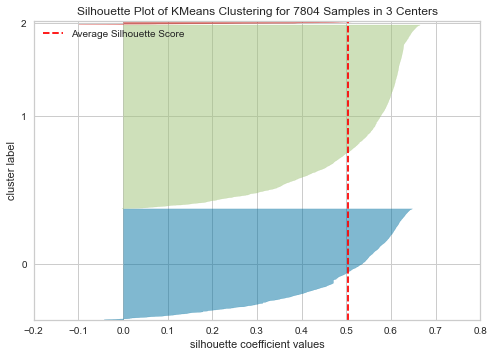

Silhouetter Score: 0.5027060872621795


In [37]:
ACAdata2kmeans3 = KMeans(n_clusters=3)
ACAdata2kmeans3.fit(ACAdata2_noid)
cluster_ACAdata23 = ACAdata2kmeans3.predict(ACAdata2_noid)
silhouette_visualizer(ACAdata2kmeans3, ACAdata2_noid, colors='yellowbrick')
silhouetteScore3 = silhouette_score(ACAdata2_noid, cluster_ACAdata23, metric='euclidean')
print('Silhouetter Score:', silhouetteScore3)

In [38]:
ACAdata23cluster = ACAdata2_noid.copy(deep=True)

ACAdata23cluster['cluster'] = cluster_ACAdata23

ACAdata23cluster

,PCIP13,CIP13BACHL,ADM_RATE_ALL,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,C150_4,C200_4,C200_L4,C150_4_POOLED,CDR3,PELL_RPY_3YR_RT,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,INEXPFTE,AVGFACSAL,cluster
0,0.1490,2.0,0.8989,0.6314,0.5000,-1.0,-1.0,0.2914,0.3520,-1.0,0.308718,0.163,0.443586698,33611.5,14250,7459.0,7079.0,0
1,0.0862,2.0,0.8673,0.8016,0.5000,-1.0,-1.0,0.5377,0.4881,-1.0,0.508550,0.080,0.732297853,23117,11886,17208.0,10170.0,0
2,0.0000,0.0,-1.0000,0.3750,0.3333,-1.0,-1.0,0.6667,0.3333,-1.0,0.285738,0.089,0.0,26995,9500,5123.0,3849.0,0
3,0.0173,2.0,0.8062,0.8098,0.4444,-1.0,-1.0,0.4835,0.5048,-1.0,0.478211,0.077,0.738341969,24738,10500,9352.0,9341.0,0
4,0.2150,2.0,0.5125,0.6219,0.3023,-1.0,-1.0,0.2517,0.3013,-1.0,0.257482,0.191,0.320016821,33452,12500,7393.0,6557.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.160,0.42789148,10500,5500,-1.0,-1.0,1
7800,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.160,0.42789148,10500,5500,-1.0,-1.0,1
7801,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.160,0.42789148,10500,5500,-1.0,-1.0,1
7802,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.160,0.42789148,10500,5500,-1.0,-1.0,1


In [39]:
ACAdata2merge= pd.merge(ACAdata2, ACAdata23cluster)
ACAdata2merge

,UNITID,PCIP13,CIP13BACHL,ADM_RATE_ALL,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,C150_4,C200_4,C200_L4,C150_4_POOLED,CDR3,PELL_RPY_3YR_RT,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,INEXPFTE,AVGFACSAL,cluster
0,100654,0.1490,2.0,0.8989,0.6314,0.5000,-1.0,-1.0,0.2914,0.3520,-1.0,0.308718,0.163,0.443586698,33611.5,14250,7459.0,7079.0,0
1,100663,0.0862,2.0,0.8673,0.8016,0.5000,-1.0,-1.0,0.5377,0.4881,-1.0,0.508550,0.080,0.732297853,23117,11886,17208.0,10170.0,0
2,100690,0.0000,0.0,-1.0000,0.3750,0.3333,-1.0,-1.0,0.6667,0.3333,-1.0,0.285738,0.089,0.0,26995,9500,5123.0,3849.0,0
3,100706,0.0173,2.0,0.8062,0.8098,0.4444,-1.0,-1.0,0.4835,0.5048,-1.0,0.478211,0.077,0.738341969,24738,10500,9352.0,9341.0,0
4,100724,0.2150,2.0,0.5125,0.6219,0.3023,-1.0,-1.0,0.2517,0.3013,-1.0,0.257482,0.191,0.320016821,33452,12500,7393.0,6557.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15111,45775802,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.461,0,16827,4750,-1.0,-1.0,1
15112,45920401,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.012,1,10281,6118,-1.0,-1.0,1
15113,47647001,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.000,-1,15847,4750,-1.0,-1.0,1
15114,47691101,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.000,-1,9500,4750,-1.0,-1.0,1


In [40]:
ACAdata2mask=(ACAdata2merge['cluster']==0)
ACAdata2merge[ACAdata2mask]

,UNITID,PCIP13,CIP13BACHL,ADM_RATE_ALL,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,C150_4,C200_4,C200_L4,C150_4_POOLED,CDR3,PELL_RPY_3YR_RT,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,INEXPFTE,AVGFACSAL,cluster
0,100654,0.1490,2.0,0.8989,0.6314,0.5000,-1.0,-1.0,0.2914,0.3520,-1.0,0.308718,0.163,0.443586698,33611.5,14250,7459.0,7079.0,0
1,100663,0.0862,2.0,0.8673,0.8016,0.5000,-1.0,-1.0,0.5377,0.4881,-1.0,0.508550,0.080,0.732297853,23117,11886,17208.0,10170.0,0
2,100690,0.0000,0.0,-1.0000,0.3750,0.3333,-1.0,-1.0,0.6667,0.3333,-1.0,0.285738,0.089,0.0,26995,9500,5123.0,3849.0,0
3,100706,0.0173,2.0,0.8062,0.8098,0.4444,-1.0,-1.0,0.4835,0.5048,-1.0,0.478211,0.077,0.738341969,24738,10500,9352.0,9341.0,0
4,100724,0.2150,2.0,0.5125,0.6219,0.3023,-1.0,-1.0,0.2517,0.3013,-1.0,0.257482,0.191,0.320016821,33452,12500,7393.0,6557.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15044,43821206,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.218,0.468199234,19811,7218,-1.0,-1.0,0
15045,43821206,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.218,0.468199234,19811,7218,-1.0,-1.0,0
15046,43821206,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.218,0.468199234,19811,7218,-1.0,-1.0,0
15047,43821206,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.000000,0.218,0.468199234,19811,7218,-1.0,-1.0,0


In [41]:
ACAdata2mask=(ACAdata2merge['cluster']==1)
ACAdata2merge[ACAdata2mask]

,UNITID,PCIP13,CIP13BACHL,ADM_RATE_ALL,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,C150_4,C200_4,C200_L4,C150_4_POOLED,CDR3,PELL_RPY_3YR_RT,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,INEXPFTE,AVGFACSAL,cluster
6,100760,0.0,0.0,-1.0,-1.0,-1.0,0.4267,0.4159,-1.0,-1.0,0.2357,-1.0,0.263,0.370833333,0.0,7500,5935.0,5805.0,1
11,101028,0.0,0.0,-1.0,-1.0,-1.0,0.5165,0.3293,-1.0,-1.0,0.2491,-1.0,0.149,0.470769231,7000,4051,4459.0,5749.0,1
14,101143,0.0,0.0,-1.0,-1.0,-1.0,0.5411,0.4500,-1.0,-1.0,0.2369,-1.0,0.250,0.456521739,11073,5999,5930.0,6257.0,1
15,101161,0.0,0.0,-1.0,-1.0,-1.0,0.5211,0.3981,-1.0,-1.0,0.1542,-1.0,0.162,0.526565465,9153,5500,4101.0,6116.0,1
17,101240,0.0,0.0,-1.0,-1.0,-1.0,0.5589,0.3865,-1.0,-1.0,0.1926,-1.0,0.285,-1,-1,0.0,5876.0,5950.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15111,45775802,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0,0.461,0,16827,4750,-1.0,-1.0,1
15112,45920401,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0,0.012,1,10281,6118,-1.0,-1.0,1
15113,47647001,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0,0.000,-1,15847,4750,-1.0,-1.0,1
15114,47691101,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.0,0.000,-1,9500,4750,-1.0,-1.0,1


In [42]:
ACAdata2mask=(ACAdata2merge['cluster']==2)
ACAdata2merge[ACAdata2mask]

,UNITID,PCIP13,CIP13BACHL,ADM_RATE_ALL,RET_FT4,RET_PT4,RET_FTL4,RET_PTL4,C150_4,C200_4,C200_L4,C150_4_POOLED,CDR3,PELL_RPY_3YR_RT,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,INEXPFTE,AVGFACSAL,cluster
73,103778,0.0,0.0,-1.0000,-1.0000,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.000000,0.012,-1,0.0,-1,53366.0,10953.0,2
134,106263,0.0,0.0,-1.0000,-1.0000,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.000000,0.033,0.901734104,12820,10500,60962.0,7805.0,2
233,110404,0.0,0.0,0.1055,0.9659,-1.00,-1.0000,-1.0,0.9307,0.8841,-1.0000,0.925129,0.000,0.0,18348.5,0.0,92854.0,16120.0,2
253,110662,0.0,1.0,0.2199,0.9626,0.75,-1.0000,-1.0,0.9031,0.9027,-1.0000,0.909258,0.022,0.904454343,15900,13244.5,38489.0,15089.0,2
256,110699,-1.0,0.0,-1.0000,-1.0000,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.000000,0.003,-1,0.0,0.0,100690.0,11593.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6578,457989,0.0,0.0,-1.0000,-1.0000,-1.00,0.5278,-1.0,-1.0000,-1.0000,0.8889,-1.000000,0.000,-1,-1,-1,62818.0,-1.0,2
6591,458122,0.0,0.0,-1.0000,-1.0000,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.000000,0.142,0.0,0.0,0.0,111294.0,-1.0,2
6837,461333,0.0,0.0,-1.0000,-1.0000,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.000000,0.000,-1,-1,-1,142817.0,-1.0,2
7241,481030,-1.0,0.0,-1.0000,-1.0000,-1.00,-1.0000,-1.0,-1.0000,-1.0000,-1.0000,-1.000000,0.000,-1,-1,-1,38786.0,-1.0,2


In [48]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
#Loading the dataset
data = load_breast_cancer(as_frame = True)
df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
 
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))


accuracy of each fold - [0.9122807017543859, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 0.9557522123893806]
Avg accuracy : 0.952553951249806
